In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.amp import AMP
from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_amp import D_AMP
from lassolver.dsolver.d_oamp import D_OAMP

# 数値実験の設定

In [3]:
N = 1000
alpha = 0.5
M = int(alpha*N)
rho = 0.2

In [4]:
kappa = 5
P = 50
T = 30

In [5]:
x = bernouli_gaussian(N, rho)
SNR = 60

In [6]:
iidG = iidGaussian(M, N, 0, 1/M)
UniInv = UniInvar(M, N, kappa)

# i.i.d.ガウス行列での信号再構成

In [7]:
tmp_iidG = [AMP(iidG.A, x, SNR), 
        D_AMP(iidG.A, x, SNR, P), 
        OAMP(iidG.A, x, SNR), 
        D_OAMP(iidG.A, x, SNR, P)]

final mse: 0.09271312120194208


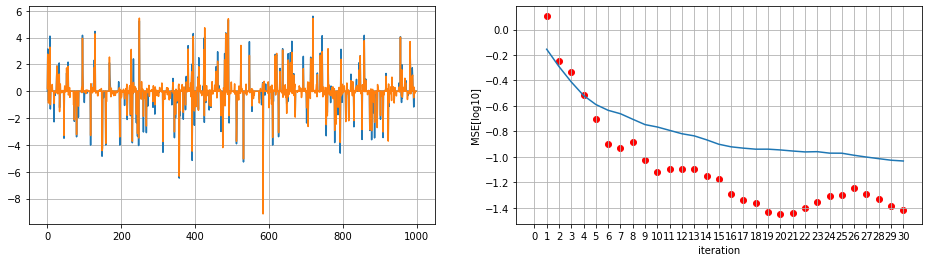

In [8]:
tmp_iidG[0].estimate(T=T)
tmp_iidG[0].result()

In [9]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp_iidG[1].estimate(T=T, log=True)

N(P-1): 49000

1/30: tau = 2.5405235726090014, v = 1.2696270016908056
Rp: 19823.0 	 F: 449 	 F\Rp: 13309
Total Communication Cost: 33132
2/30: tau = 1.0944954083761729, v = 0.5466129195743913
Rp: 22618.0 	 F: 528 	 F\Rp: 14277
Total Communication Cost: 36895
3/30: tau = 0.8646101320449439, v = 0.4316702814087768
Rp: 22100.0 	 F: 497 	 F\Rp: 13608
Total Communication Cost: 35708
4/30: tau = 0.5957364393041691, v = 0.2972334350383892
Rp: 20617.0 	 F: 518 	 F\Rp: 14953
Total Communication Cost: 35570
5/30: tau = 0.4093074487317007, v = 0.2040189397521551
Rp: 21918.0 	 F: 548 	 F\Rp: 15123
Total Communication Cost: 37041
6/30: tau = 0.3187762547516173, v = 0.1587533427621134
Rp: 21093.0 	 F: 553 	 F\Rp: 15591
Total Communication Cost: 36684
7/30: tau = 0.21492924644535322, v = 0.10682983860898138
Rp: 24091.0 	 F: 578 	 F\Rp: 14623
Total Communication Cost: 38714
8/30: tau = 0.17193551134255247, v = 0.08533297105758099
Rp: 24832.0 	 F: 574 	 F\Rp: 14017
Total Communication Cost: 38849
9/30:

final mse: 0.17662608663705626


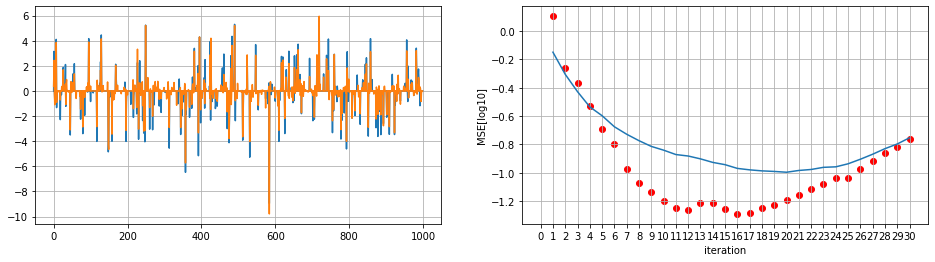

In [10]:
tmp_iidG[1].result()

final mse: 0.0479358730010644


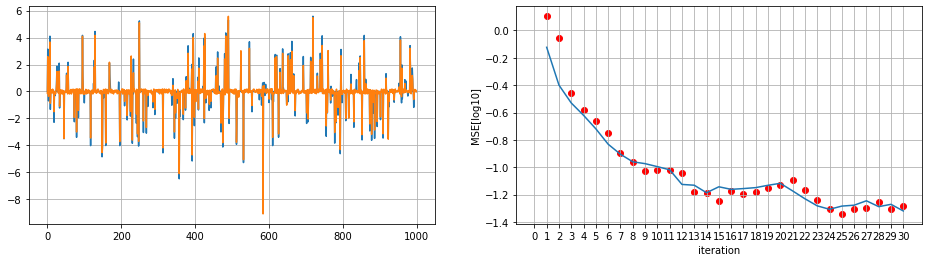

In [11]:
tmp_iidG[2].estimate(T=T)
tmp_iidG[2].result()

In [12]:
print("N(P-1): {}".format(N*(P-1)))
print("")
tmp_iidG[3].estimate(T=T, log=True)

N(P-1): 49000

1/30: tau = 1.2719406567741531, v = 1.269392509664156
Rp: 33045.0 	 F: 442 	 F\Rp: 7533
Total Communication Cost: 40578
2/30: tau = 0.7034921437102444, v = 0.7009451469118908
Rp: 33058.0 	 F: 454 	 F\Rp: 7670
Total Communication Cost: 40728
3/30: tau = 0.330843722683406, v = 0.3283001147109724
Rp: 33108.0 	 F: 455 	 F\Rp: 7590
Total Communication Cost: 40698
4/30: tau = 0.19939274930412, v = 0.19685581134540847
Rp: 32871.0 	 F: 519 	 F\Rp: 8796
Total Communication Cost: 41667
5/30: tau = 0.18356558584611152, v = 0.1810324970605376
Rp: 32826.0 	 F: 477 	 F\Rp: 8053
Total Communication Cost: 40879
6/30: tau = 0.13038637312870494, v = 0.12785849918922673
Rp: 33074.0 	 F: 504 	 F\Rp: 8339
Total Communication Cost: 41413
7/30: tau = 0.11270633260152028, v = 0.11018386444762672
Rp: 33212.0 	 F: 467 	 F\Rp: 7573
Total Communication Cost: 40785
8/30: tau = 0.07133263026027042, v = 0.06882112257588326
Rp: 33189.0 	 F: 504 	 F\Rp: 8103
Total Communication Cost: 41292
9/30: tau = 0

final mse: 0.006196527897620174


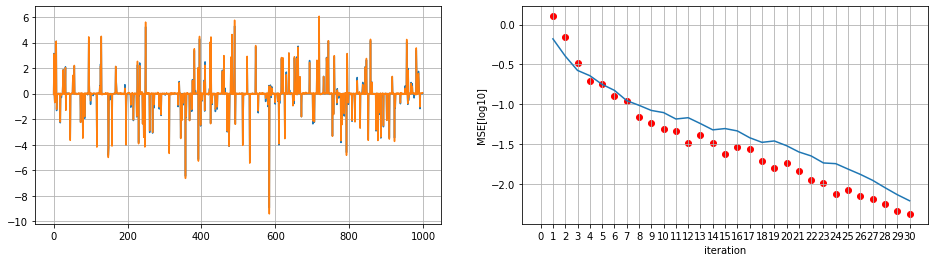

In [13]:
tmp_iidG[3].result()

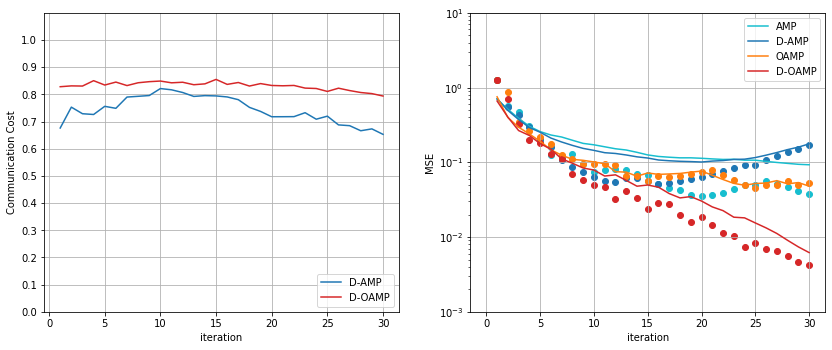

In [14]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt_CC(tmp_iidG[1].communication_cost, 'D-AMP', T, N, P, 'tab:blue')
plt_CC(tmp_iidG[3].communication_cost, 'D-OAMP', T, N, P, 'tab:red')
plt.grid()

plt.subplot(122)
plt_MSE(tmp_iidG[0].mse, 'AMP', T, 'tab:cyan')
plt_SE(tmp_iidG[0].v, T, 'tab:cyan')
plt_MSE(tmp_iidG[1].mse, 'D-AMP', T, 'tab:blue')
plt_SE(tmp_iidG[1].v, T, 'tab:blue')
plt_MSE(tmp_iidG[2].mse, 'OAMP', T, 'tab:orange')
plt_SE(tmp_iidG[2].v, T, 'tab:orange')
plt_MSE(tmp_iidG[3].mse, 'D-OAMP', T, 'tab:red')
plt_SE(tmp_iidG[3].v, T, 'tab:red')
plt.grid()

# ユニタリ不変行列での信号再構成

In [15]:
tmp_UniInv = [AMP(UniInv.A, x, SNR), 
              D_AMP(UniInv.A, x, SNR, P), 
              OAMP(UniInv.A, x, SNR), 
              D_OAMP(UniInv.A, x, SNR, P)]

final mse: 9.64122587932806e+57


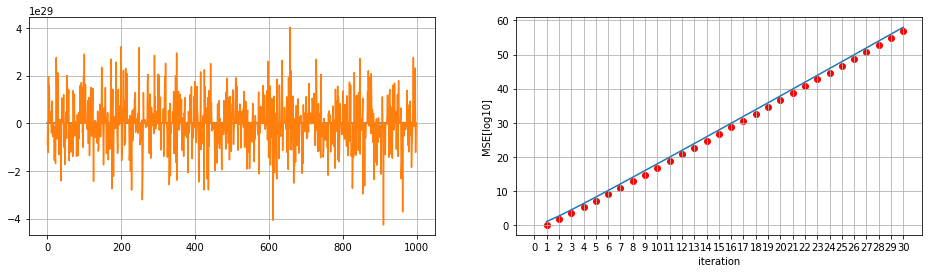

In [16]:
tmp_UniInv[0].estimate(T=T)
tmp_UniInv[0].result()

In [17]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp_UniInv[1].estimate(T=T, log=True)

N(P-1): 49000


1/30: tau = 2.4464741541181585, v = 1.2217615944788818
Rp: 35786.0 	 F: 765 	 F\Rp: 10752
Total Communication Cost: 46538
2/30: tau = 108.69500667696747, v = 54.34602785590353
Rp: 32900.0 	 F: 771 	 F\Rp: 13087
Total Communication Cost: 45987
3/30: tau = 5509.123344453929, v = 2754.560196744384
Rp: 33398.0 	 F: 757 	 F\Rp: 12452
Total Communication Cost: 45850
4/30: tau = 360081.1385343734, v = 180040.5677917041
Rp: 33597.0 	 F: 762 	 F\Rp: 12447
Total Communication Cost: 46044
5/30: tau = 27114892.939232953, v = 13557446.468140991
Rp: 33699.0 	 F: 756 	 F\Rp: 12269
Total Communication Cost: 45968
6/30: tau = 2198651936.994143, v = 1099325968.4955962
Rp: 33702.0 	 F: 748 	 F\Rp: 12141
Total Communication Cost: 45843
7/30: tau = 186864455152.32037, v = 93432227576.1587
Rp: 33838.0 	 F: 744 	 F\Rp: 11956
Total Communication Cost: 45794
8/30: tau = 16507368152105.758, v = 8253684076052.878
Rp: 33956.0 	 F: 740 	 F\Rp: 11774
Total Communication Cost: 45730
9/30: tau = 14941

final mse: 1.2233889895571066e+58


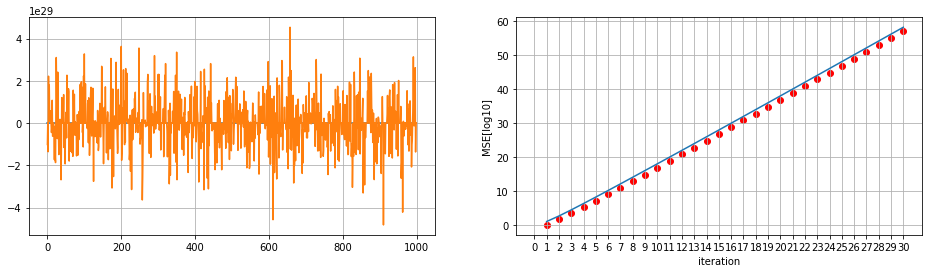

In [18]:
tmp_UniInv[1].result()

final mse: 0.015391401042799067


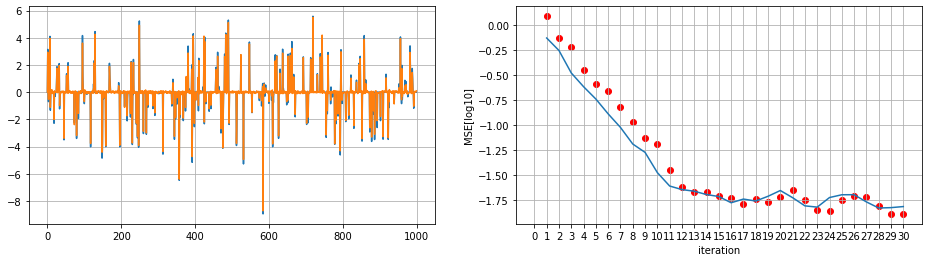

In [19]:
tmp_UniInv[2].estimate(T=T)
tmp_UniInv[2].result()

In [20]:
print("N(P-1): {}".format(N*(P-1)))
print("\n")
tmp_UniInv[3].estimate(T=T, log=True)

N(P-1): 49000


1/30: tau = 1.2250374087528093, v = 1.2223215132087362
Rp: 33824.0 	 F: 457 	 F\Rp: 7376
Total Communication Cost: 41200
2/30: tau = 0.7459908070273242, v = 0.7432757884714211
Rp: 33801.0 	 F: 493 	 F\Rp: 7927
Total Communication Cost: 41728
3/30: tau = 0.5523226618247533, v = 0.5496091627633901
Rp: 33747.0 	 F: 467 	 F\Rp: 7522
Total Communication Cost: 41269
4/30: tau = 0.3294357104756433, v = 0.32672455458482996
Rp: 33717.0 	 F: 486 	 F\Rp: 7819
Total Communication Cost: 41536
5/30: tau = 0.22748106517247543, v = 0.22477385055302287
Rp: 33717.0 	 F: 501 	 F\Rp: 8101
Total Communication Cost: 41818
6/30: tau = 0.18732903281478275, v = 0.1846251096782789
Rp: 33797.0 	 F: 497 	 F\Rp: 8009
Total Communication Cost: 41806
7/30: tau = 0.13647071962730373, v = 0.1337712399005398
Rp: 33998.0 	 F: 498 	 F\Rp: 7774
Total Communication Cost: 41772
8/30: tau = 0.08320862084149237, v = 0.08051849612063257
Rp: 33952.0 	 F: 508 	 F\Rp: 7934
Total Communication Cost: 41886
9/30: tau

final mse: 0.009404553780107003


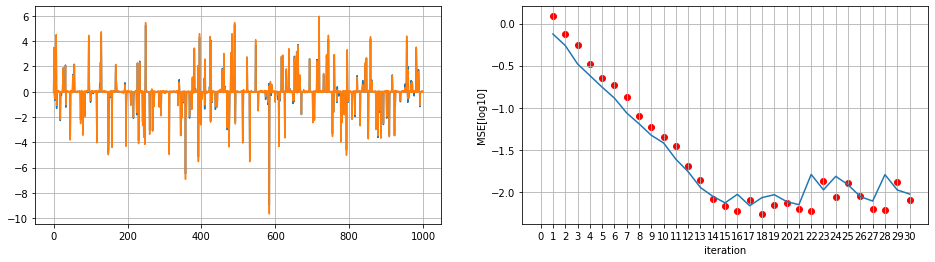

In [21]:
tmp_UniInv[3].result()

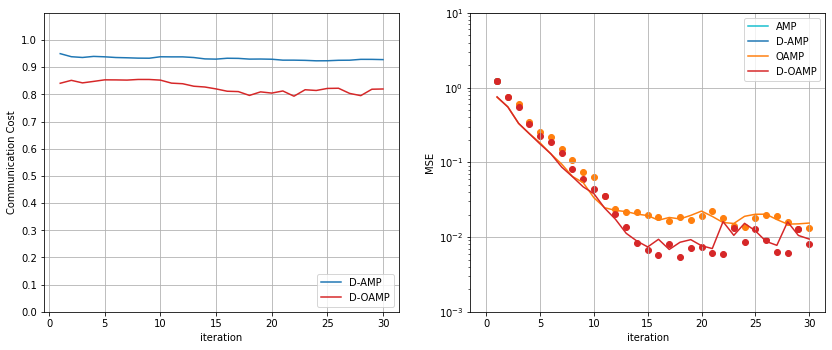

In [22]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt_CC(tmp_UniInv[1].communication_cost, 'D-AMP', T, N, P, 'tab:blue')
plt_CC(tmp_UniInv[3].communication_cost, 'D-OAMP', T, N, P, 'tab:red')
plt.grid()

plt.subplot(122)
plt_MSE(tmp_UniInv[0].mse, 'AMP', T, 'tab:cyan')
plt_SE(tmp_UniInv[0].v, T, 'tab:cyan')
plt_MSE(tmp_UniInv[1].mse, 'D-AMP', T, 'tab:blue')
plt_SE(tmp_UniInv[1].v, T, 'tab:blue')
plt_MSE(tmp_UniInv[2].mse, 'OAMP', T, 'tab:orange')
plt_SE(tmp_UniInv[2].v, T, 'tab:orange')
plt_MSE(tmp_UniInv[3].mse, 'D-OAMP', T, 'tab:red')
plt_SE(tmp_UniInv[3].v, T, 'tab:red')
plt.grid()